In [1]:
from wmf import wmf 
import numpy as np
import pylab as pl
import pandas as pd
import pickle
import datetime
from datetime import timedelta
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings('ignore')
import scipy as scp
import os
import aforos as af
from IPython.display import IFrame
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xlsxwriter
import codecs
from multiprocessing import Pool
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import PathPatch
import matplotlib.patches as patche
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
def aforo(codigo,DEM='dem_amva60',DIR='dir_amva60',aforo=1):
    '''runs aforos module
    Parameters
    ----------
    codigo: id in dbase
    salida: campain folder name
    DEM : dem name
    DIR : dir name
    aforo : flow measurement number or id
    -------
    Returns
        ------
        out: self
        sets module aforos up 
        '''
    self = af.aforos(codigo,aforo=int(aforo),
                    nombre = df_informacion.loc[codigo,'FolderName'])
    self.ruta_dem = '/media/nicolas/Home/nicolas/01_SIATA/raster/%s.tif'%DEM
    self.ruta_dir = '/media/nicolas/Home/nicolas/01_SIATA/raster/%s.tif'%DIR
    self.longitud = float(df_informacion.loc[codigo,'Longitud'])
    self.latitud = float(df_informacion.loc[codigo,'Latitud'])
    self.name = df_informacion.loc[codigo,'Nombre']
    self.municipio = df_informacion.loc[codigo,'Municipio']
    self.direccion = df_informacion.loc[codigo,'Direccion']
    self.barrio = df_informacion.loc[codigo,'Barrio']
    self.subcuenca = df_informacion.loc[codigo,'Subcuenca']
    return self

def runbyid(dfe_id):
    self = aforo(int(dfe.loc[dfe_id,'id_estacion_asociada']),aforo=dfe.loc[dfe_id,'aforo'])
    self.fecha = pd.to_datetime(dfe.loc[dfe_id,'fecha'])
    self.date = self.fecha.strftime('%Y-%m-%d %H:%M')
    return self

In [3]:
hora_inicial = '06:00'
hora_final = '18:00'
df_informacion = pd.read_csv('../information/info_redrio.csv',index_col=0)
texto = ['% ----------------------------------------------',
         '% ---------------------TEXTO AQUÍ---------------',
         '% ----------------------------------------------']
#estaciones = pd.read_csv('/media/nicolas/Home/Jupyter/Aforos/informacion/estaciones.csv',index_col=0)
#nombres = pd.read_csv('/media/nicolas/Home/Jupyter/Aforos/informacion/nombres.csv',index_col=0)

# chapter "descripción y morfometría"

In [8]:
def get_descripcion(codigo):
    '''Abre la descripción del sitio de aforo, es un archivo .txt''' 
    with open('descripcionestxt/%s.txt'%df_informacion.loc[codigo,'FolderName'], 'r') as f:
        descripcion = f.read()
    return descripcion

columns = ['codigo','nombre','area','perimetro','lon_cauce','lon_cuenca','pen_cauce','pen_cuenca','tiempo_c']
descripcion = ['']
data = []
for codigo in df_informacion.sort_values(by='Nombre').index:
    self = aforo(codigo)
    print 'fig:desc%s'%self.nombre
    print 'tab:description_table_%s'%self.nombre  
    descripcion+=self.latex_description(get_descripcion(codigo),'descripcion/foto_%s.jpg'%self.nombre,\
                  'descripcion/map_%s.png'%self.nombre,'fig:desc%s'%self.nombre)+ self.latex_description_table()
#     descripcion+=['\\clearpage']
#     self.plot_map_location('descripcion/map_%s.png'%self.nombre,close=False)
#     try:
#         self.simubasin(rute=True,show=False)
#         self.cu.GetGeo_Parameters()
#         self.get_geoparameters()
#         self.plot_geo('descripcion/morfo_%s.png'%self.nombre,figsize=(16,4))
#         descripcion+=self.latex_geo('descripcion/morfo_%s.png'%self.nombre)
#         descripcion+=['La cuenca generada en el punto ubicado en el cauce de la estación {} con coordenadas ({},{}), posee un área de {} $[km^2]$, una longitud de la línea divisoria de aguas de {} [km] y una pendiente promedio de {} [\\%]; la cota mayor de la cuenca se encuentra ubicada a una altura de {} [msnm].'.format(self.name, round(self.latitud,3),round(self.longitud,3),round(self.geoparameters[0],2), round(self.geoparameters[-1],2), round(self.geoparameters[-2],2),round(self.dem.max(),2))]
#         descripcion+= ["\\\ El cauce principal tiene una longitud de {} [km], alcanza una pendiente máxima de {} \\% y un valor promedio de {} \\%.".format(round(self.geoparameters[8],2),round(self.cu.ppal_slope.max(),2),round(self.geoparameters[-3],2))]
#         descripcion += ['El tiempo de concentración de la cuenca es de %s horas.'%(round(self.tc_filtrado,3))]
#         descripcion+=self.latex_geo_table()
#         df_informacion.loc[codigo,'morfo']=1
#         datos = [self.codigo,self.nombre,self.cu.GeoParameters['Area[km2]'],\
#         self.cu.GeoParameters['Perimetro[km]'],\
#         self.cu.GeoParameters['Long_Cau [km]'],\
#         self.cu.GeoParameters['Long_Cuenca [km]'],\
#         self.cu.GeoParameters['Pend_Cauce [%]'],\
#         self.cu.GeoParameters['Pend_Cuenca [%]'],\
#         self.tc_filtrado]
#         data.append(datos)
#         print self.name
#     except:
#         df_informacion.loc[codigo,'morfo']=0
# descripcion+=['\\section{Resumen de parámetros morfométricos}']
# descripcion+=self.latex_figure(17,'descripcion/morfometria_1.png','Parámetros morfométricos 1','fig:morfo1')
# descripcion+=self.latex_figure(17,'descripcion/morfometria_2.png','Parámetros morfométricos 2','fig:morfo2')
# np.savetxt('descripcion.tex', descripcion, fmt='%s')

fig:descAncon_Norte_E12
tab:description_table_Ancon_Norte_E12
fig:descAncon_Sur
tab:description_table_Ancon_Sur
fig:descAntes_de_San_Fernando_E5
tab:description_table_Antes_de_San_Fernando_E5
fig:descAula_Ambiental
tab:description_table_Aula_Ambiental
fig:descColector_Oriental
tab:description_table_Colector_Oriental
fig:descDescarga_Ptar_San_Fernando
tab:description_table_Descarga_Ptar_San_Fernando
fig:descPuente_De_La_Aguacatala
tab:description_table_Puente_De_La_Aguacatala
fig:descQ_Dona_Maria_E4
tab:description_table_Q_Dona_Maria_E4
fig:descNiquia
tab:description_table_Niquia
fig:descPapelsa_E16
tab:description_table_Papelsa_E16
fig:descPrimavera_E2
tab:description_table_Primavera_E2
fig:descPuente_Acevedo_E9
tab:description_table_Puente_Acevedo_E9
fig:descPuente_Gabino
tab:description_table_Puente_Gabino
fig:descPuente_Machado_E11
tab:description_table_Puente_Machado_E11
fig:descQ_Altavista
tab:description_table_Q_Altavista
fig:descana_diaz
tab:description_table_ana_diaz
fig:descDM

In [119]:
data = pd.read_csv('../information/morfometria_redrio.csv',index_col=0)

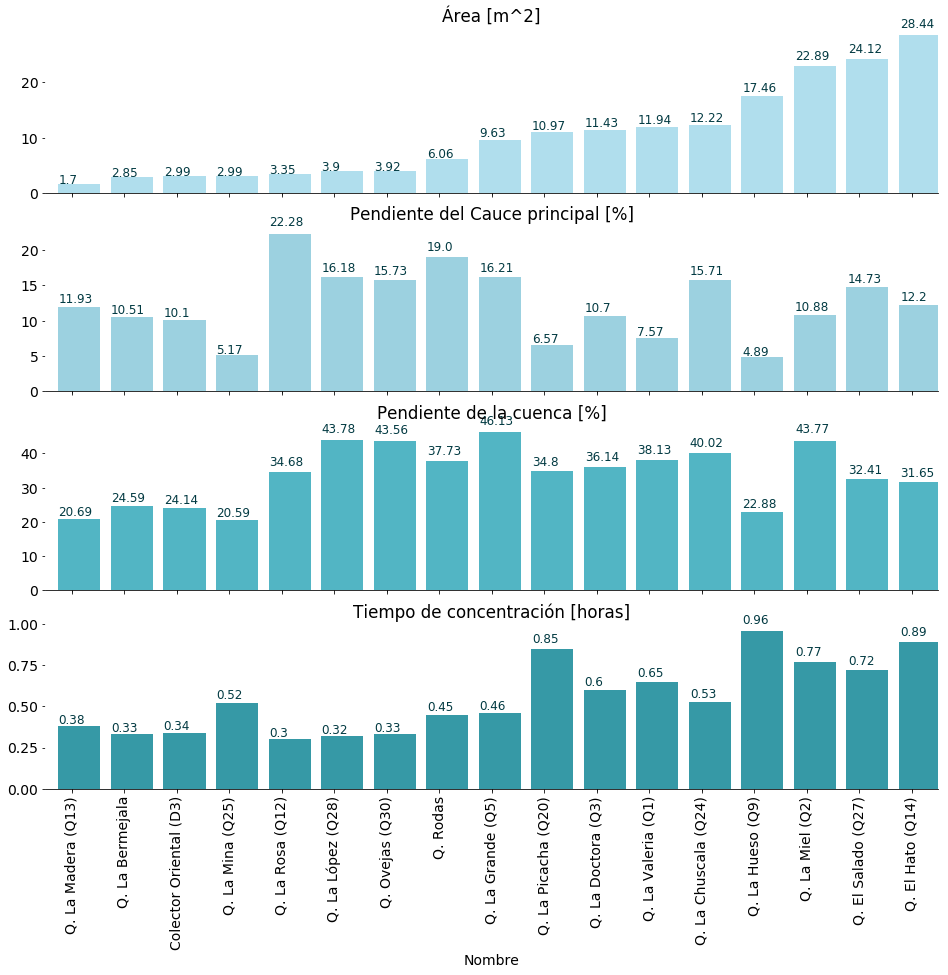

In [123]:
df = df2.iloc[:17]
df.columns = [u'Área [m^2]','Pendiente del Cauce principal [%]','Pendiente de la cuenca [%]','Tiempo de concentración [horas]']
axis = df.applymap(lambda x:float(x)).plot(subplots=True,figsize=(16,14),legend=False,color=self.colores_siata,kind='bar')
font = {'size'   : 14}
plt.rc('font', **font)

for ax in axis:
    for container in ax.containers:
          plt.setp(container, width=0.8)
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)),
                    (p.get_x() * 1.002, p.get_height() * 1.05),
                    fontsize = 12,
                    color=self.colores_siata[-1])

for ax in axis:
    for j in ['top','right','left']:
        ax.spines[j].set_edgecolor('white')
plt.savefig('descripcion/morfometria_1.png',format='png',bbox_inches='tight')

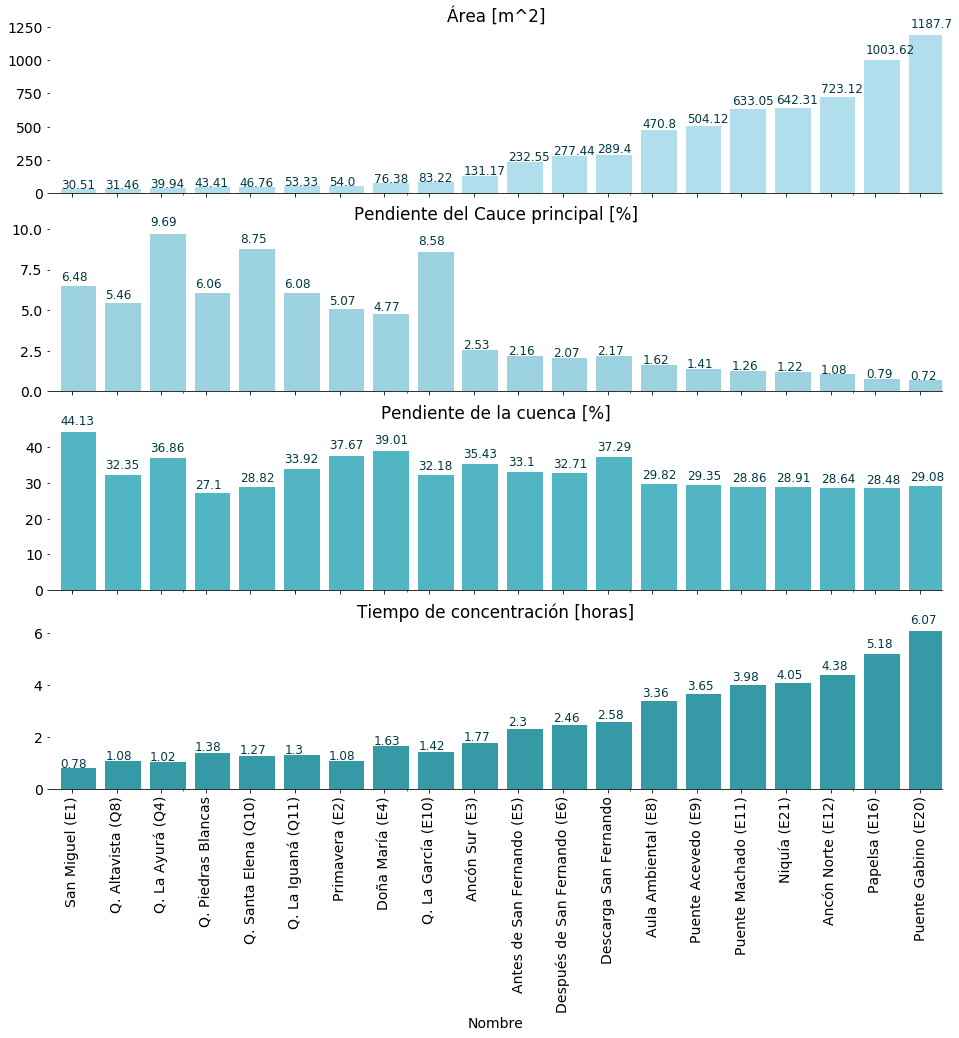

In [103]:
df = df2.iloc[17:]
df.columns = [u'Área [m^2]','Pendiente del Cauce principal [%]','Pendiente de la cuenca [%]','Tiempo de concentración [horas]']
axis = df.applymap(lambda x:float(x)).plot(subplots=True,figsize=(16,14),legend=False,color=self.colores_siata,kind='bar')
font = {'size'   : 14}
plt.rc('font', **font)

for ax in axis:
    for container in ax.containers:
          plt.setp(container, width=0.8)
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)),
                    (p.get_x() * 1.002, p.get_height() * 1.05),
                    fontsize = 12,
                    color=self.colores_siata[-1])

for ax in axis:
    for j in ['top','right','left']:
        ax.spines[j].set_edgecolor('white')
plt.savefig('descripcion/morfometria_2.png',format='png',bbox_inches='tight')

In [111]:
salidas = ['\\include{descripcion}',\
           '\\chapter{Resultados de las campañas}',\
           '\\include{20170222}',\
           '\\include{20170308}',\
           '\\include{20170309}',\
           '\\include{20170426}',\
           '\\include{20170621}',\
           '\\include{20170622}',\
           '\\include{20170710}',\
           '\\include{20170712_LaHueso}',\
           '\\include{20170712_Maria}',\
           '\\include{20170713}']
nombre_info = 'informe_redrio'
includes = ['\\include{Portada}','\\setlength{\\headsep}{40pt}',\
            '\\tableofcontents',\
            '\\listoffigures',\
            '\\listoftables',\
            '\\include{introduccion}',\
            '\\chapter{Información de las estaciones aforadas}']
self.informe(includes+ ['\\include{descripcion}'],\
             header_filepath='figuras/header.png',\
             header_text='Informe salidas modelación',\
             logo_filepath='figuras/logo.png',\
             cover_filepath = 'figuras/cover.png',\
             foot_filepath = 'figuras/foot.png',\
             nombre_info=nombre_info)

#self.informe(includes,ruta = '../figuras',nombre_info=nombre_info)
IFrame('%s_optimizado.pdf'%nombre_info, width=1000, height=1000)

# Salida 22 de febrero

In [55]:
fecha = pd.to_datetime('2017-02-22')
dfe = pd.read_csv('../information/20170222_dfe.csv',index_col=0)
nombre_salida = u'Campaña 22 de Febrero'

# lluvia
para la lluvia se usa la estación puente gabino

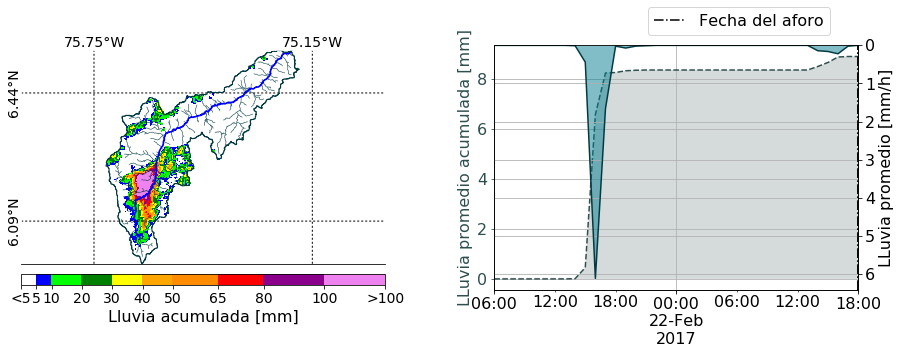

In [56]:
fecha = pd.to_datetime('2017-02-22')
self = aforo(1061)
self.fecha = fecha+datetime.timedelta(hours=18)
#self.get_rain()
self.simubasin(rute=True,show=False)
rain = self.plot_lluvia_aforo(ax2color='darkslategrey',
                  fecha=self.fecha.strftime('%Y-%m-%d')+' 18:00',
                  ruta='%s/%s_rain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),
                  formato='png')

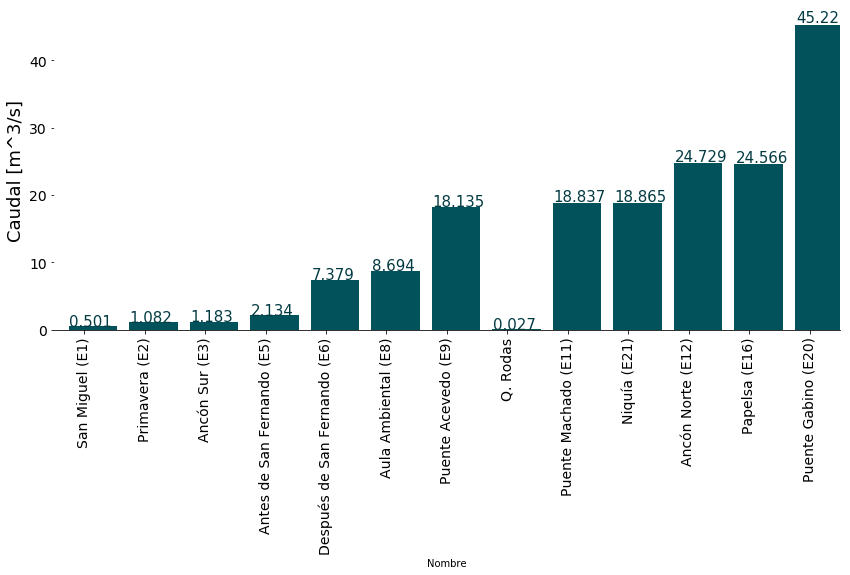

In [57]:
resumen = df_informacion.loc[dfe['id_estacion_asociada'].values].set_index('Nombre')
resumen['caudal_medio']= dfe['caudal_medio'].values
self.plot_resumen_flow(resumen['caudal_medio'],'%s/%s_flux.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')))

Colombia
Antioquia


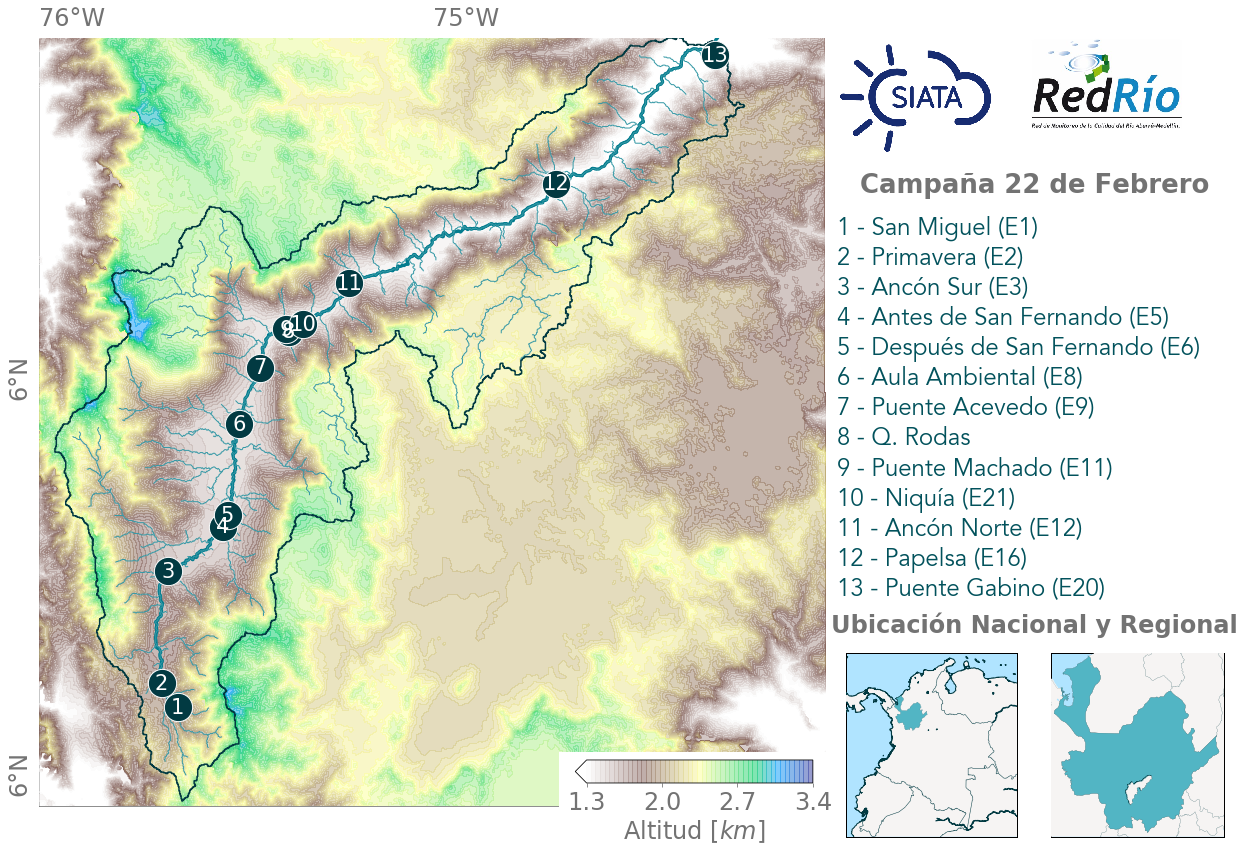

In [12]:
point = df_informacion.loc[dfe['id_estacion_asociada'].values].sort_values(by='Latitud')
self.Plot_Mapa2(add_scatter=[point['Longitud'].values,point['Latitud'].values],\
                title =nombre_salida,Logo='SIATA2.png',\
                Drainage='/media/nicolas/maso/Mario/shapes/nets/Puente_Gabino_1061/Puente_Gabino_1061',\
                add_stations=map(lambda x:x.decode('utf-8'),point['Nombre'].values),\
                georef=[6.556,5.975,-75.725,-75.1255],clim=[1300,3400],fontsize=24,\
                Basin='/media/nicolas/maso/Mario/shapes/basins/Puente_Gabino_1061/Puente_Gabino_1061')

self.m.readshapefile('/media/nicolas/maso/Mario/shapes/streams/169/169','drenaje',
                     color=self.colores_siata[-3],
                     linewidth=3.0,zorder=5)
self.m.readshapefile('/media/nicolas/maso/Mario/shapes/AreaMetropolitana','area',
                     color=self.colores_siata[-1],
                     linewidth=3.0,zorder=5)

plt.savefig('%s/%s_map_campain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),format='png',bbox_inches='tight')


# Tabla resultados

In [58]:
nombre_salida = 'Campaña 22 de Febrero'
caption = 'Parámetros hidráulicos %s'%nombre_salida
columns = ['Caudal medio','Velocidad media','Área','Perímetro','Altura media','Rádio hidráulico']
cellwidth = [30]+6*[70/6]
df_latex = dfe[['caudal_medio','velocidad_media','area_total','perimetro','altura_media','radio_hidraulico']]
df_latex.index = df_informacion.loc[dfe['id_estacion_asociada'].values]['Nombre'].values
tabla=self.latex_table_from_df(df_latex,caption,'tab:%s'%fecha.strftime('%Y%m%d'),columns,cellwidth,width=5.6)

# curva de calibración gabino

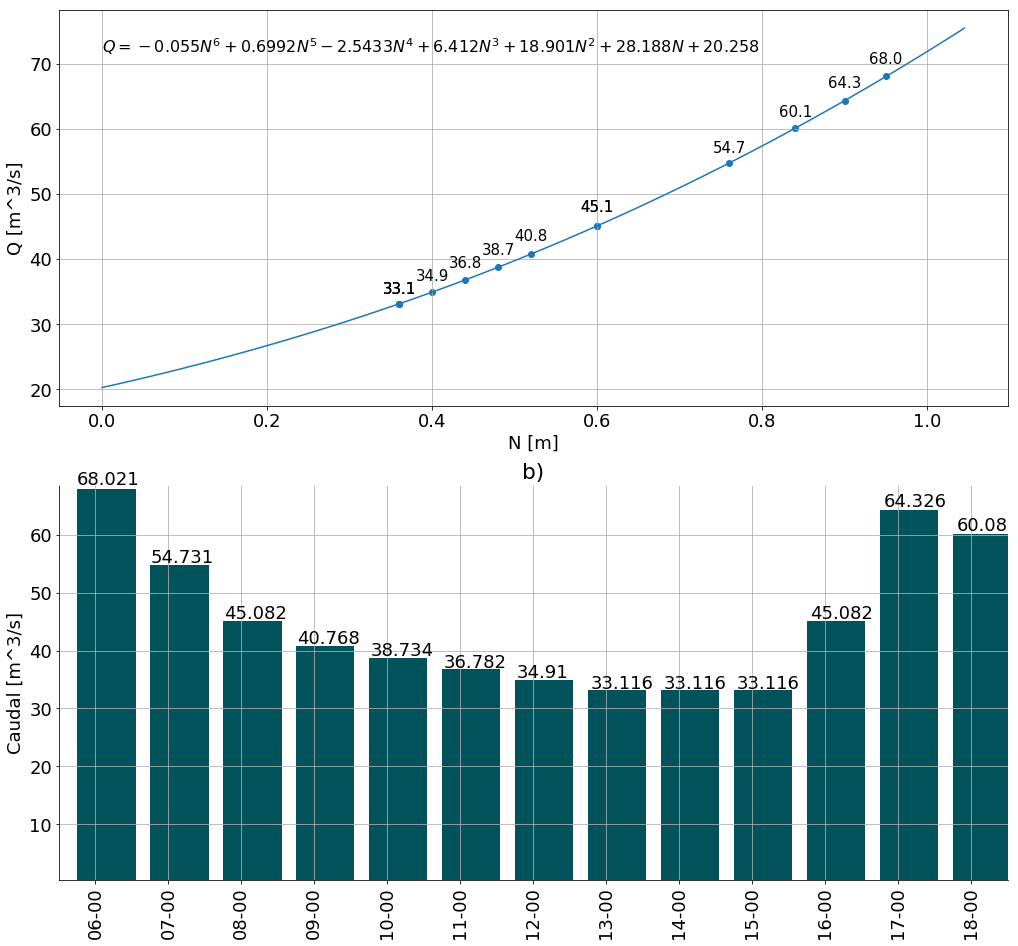

In [130]:
N = np.array([0.95,0.76,0.60,0.52,0.48,0.44,0.4,0.36,0.36,0.36,0.60,0.90,0.84],float)
ruta = '%s/curva_gabino.png'%fecha.strftime('%Y%m%d') 
self.plot_curva_gabino(N,ruta=ruta)

1
2
3
4
5
6
8
10
11


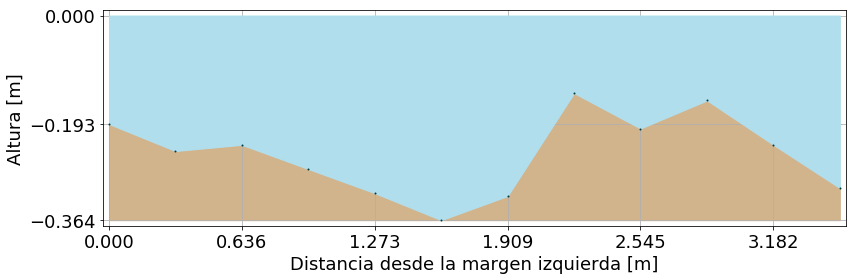

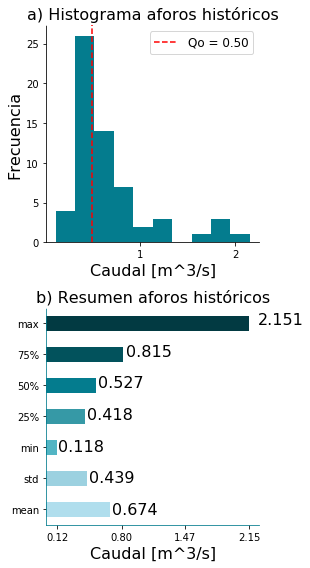

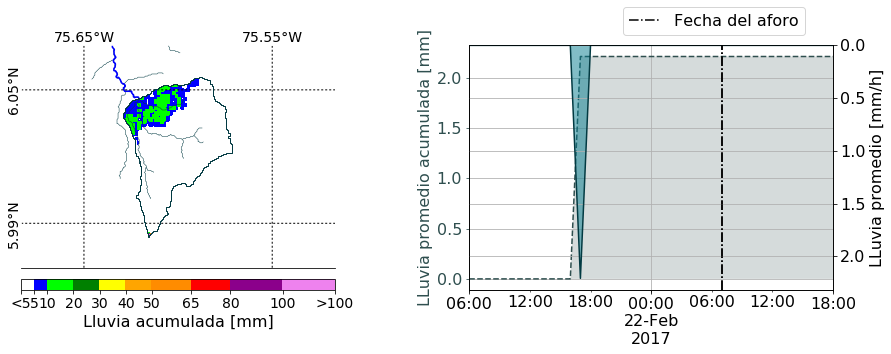

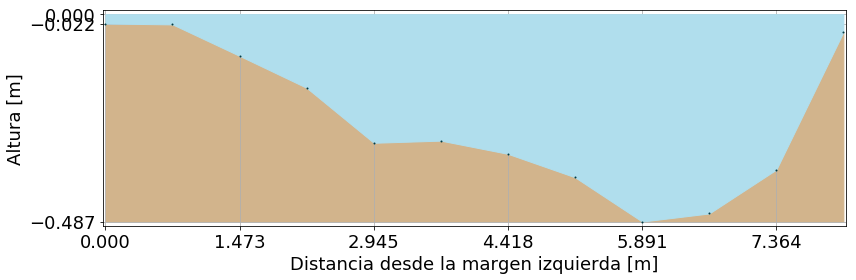

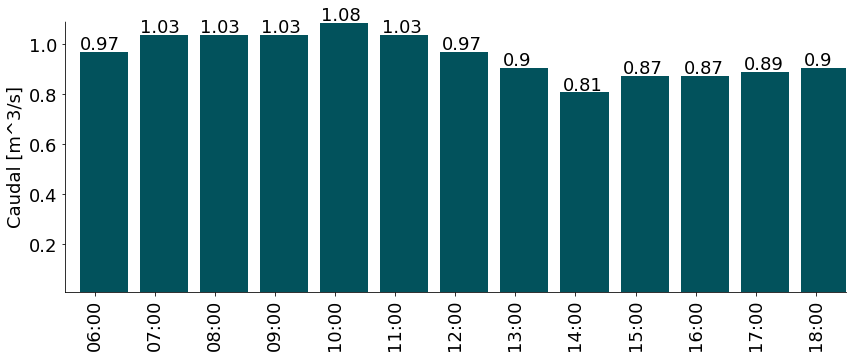

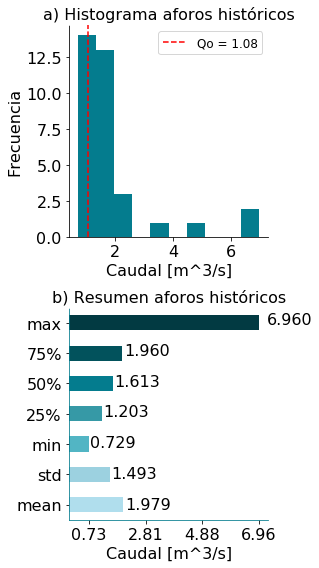

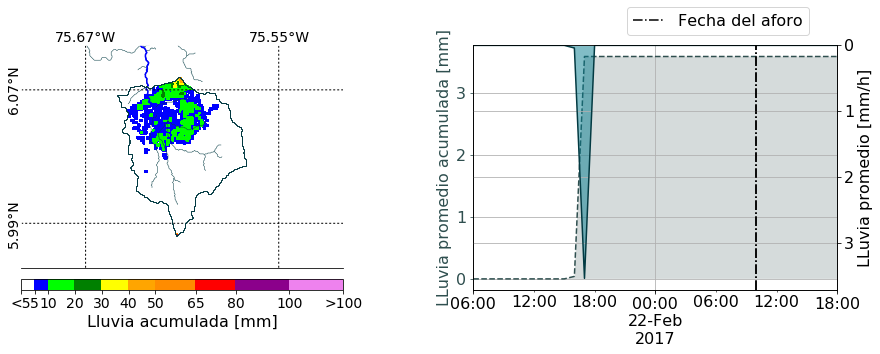

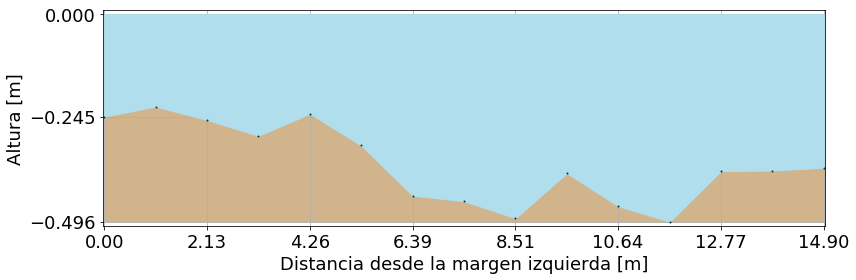

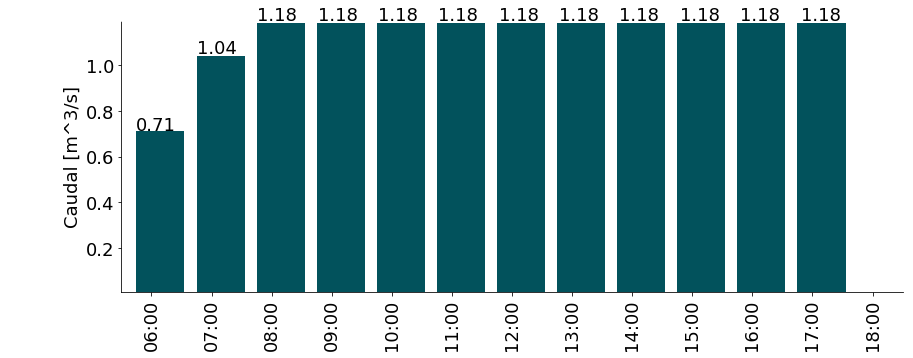

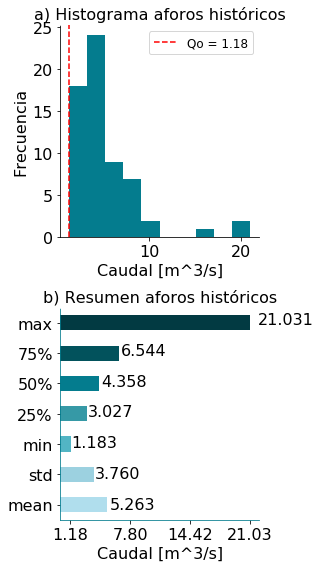

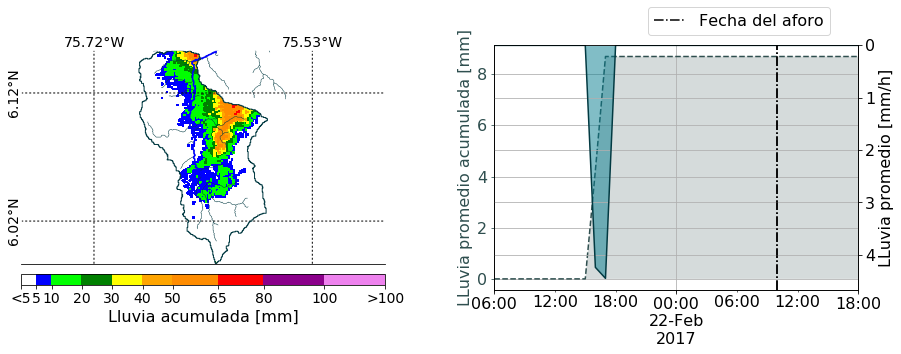

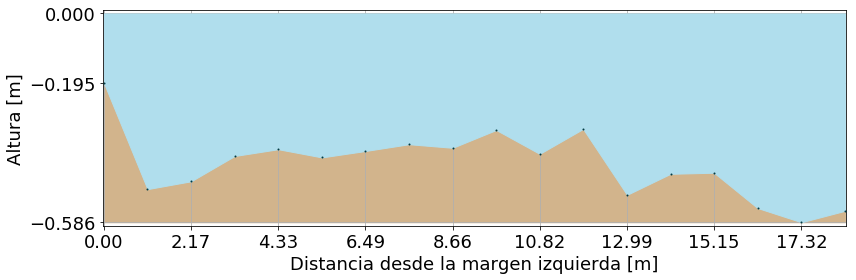

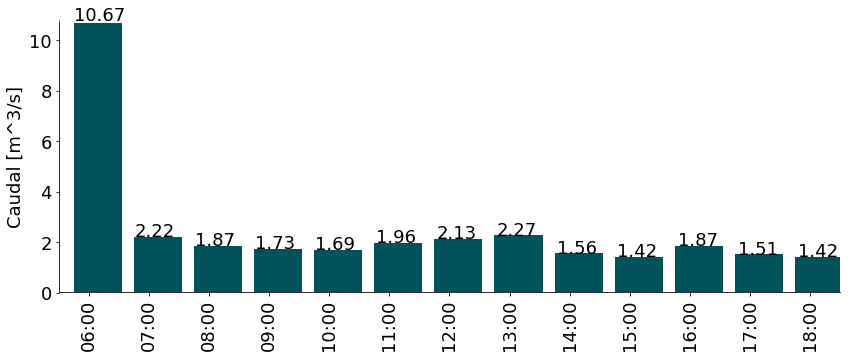

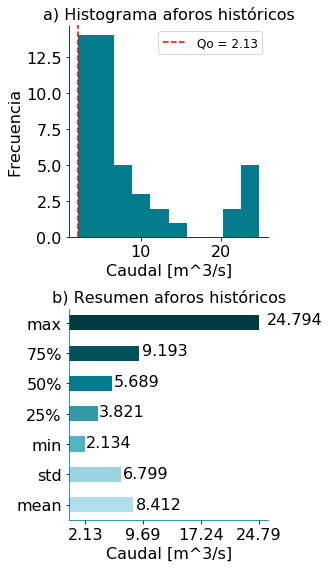

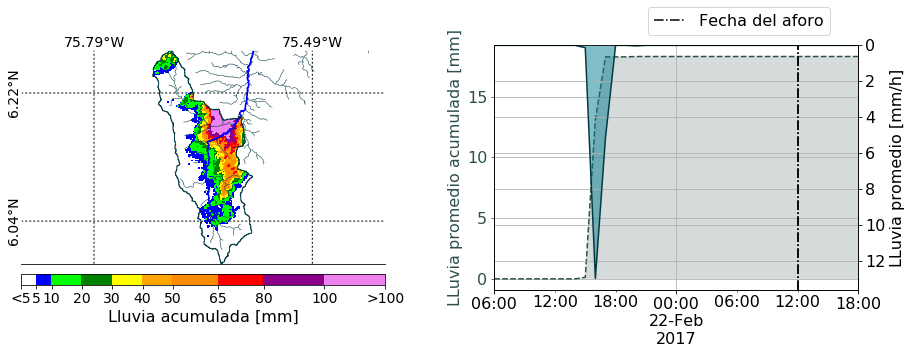

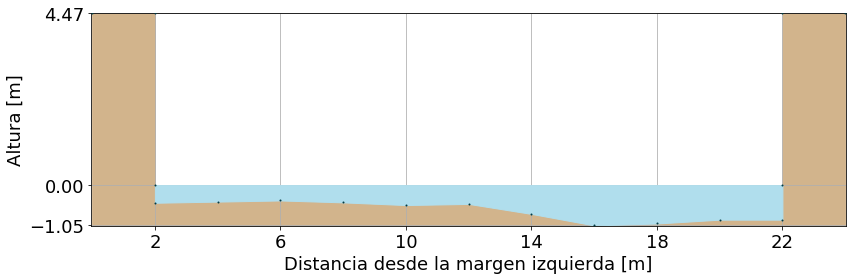

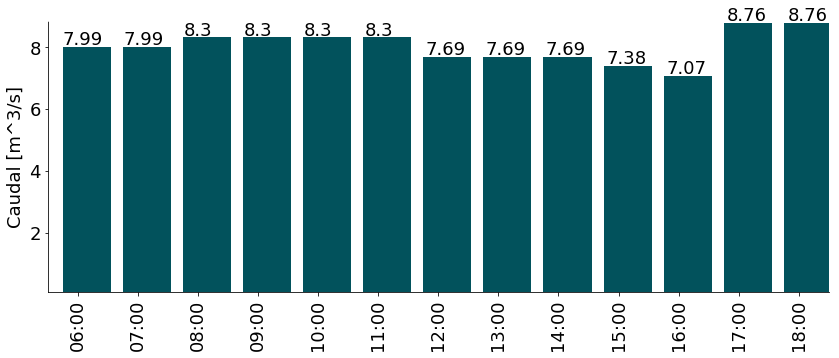

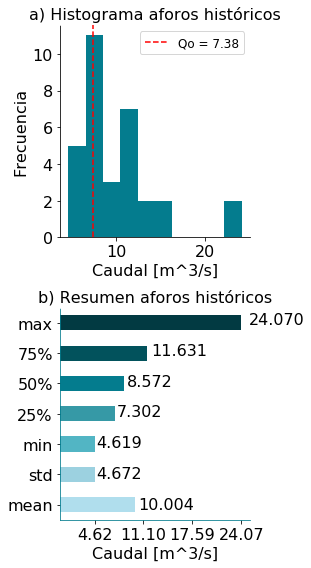

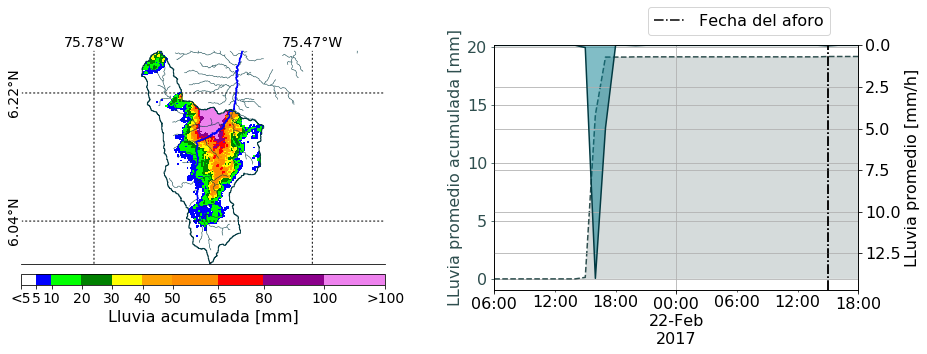

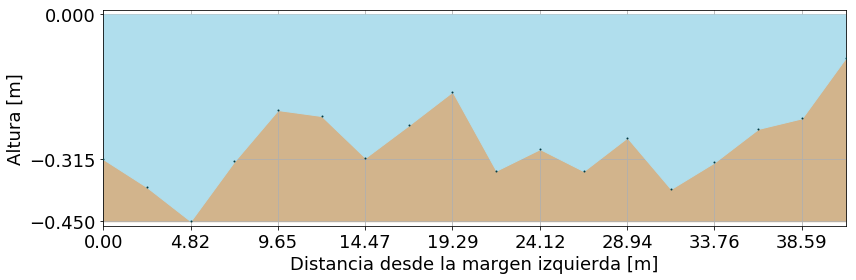

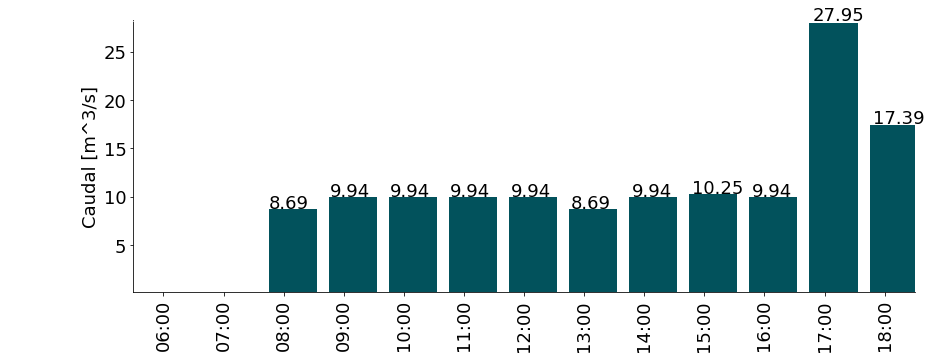

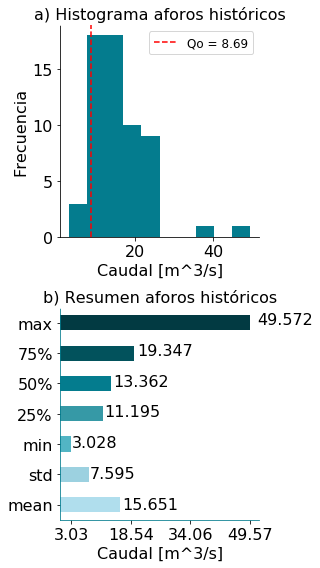

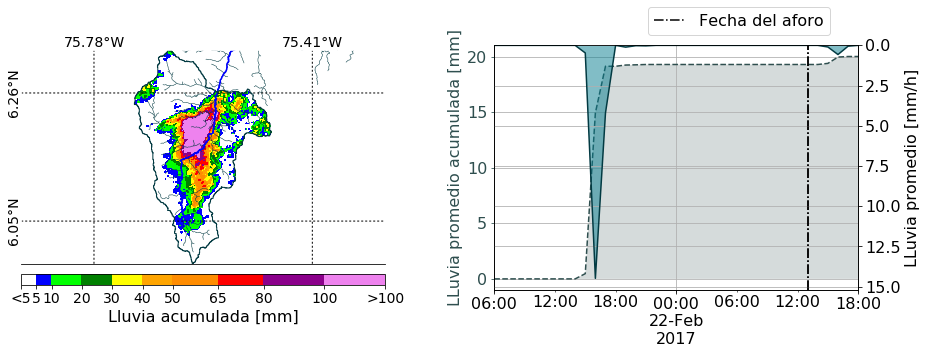

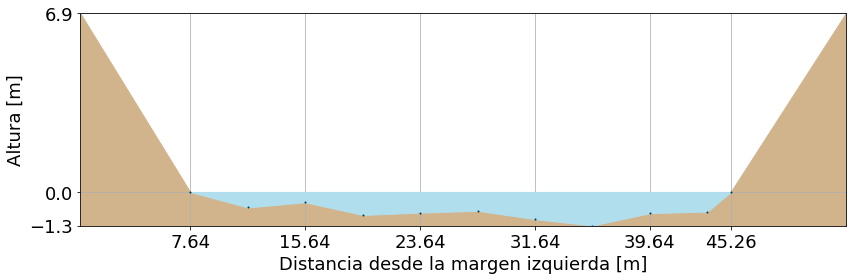

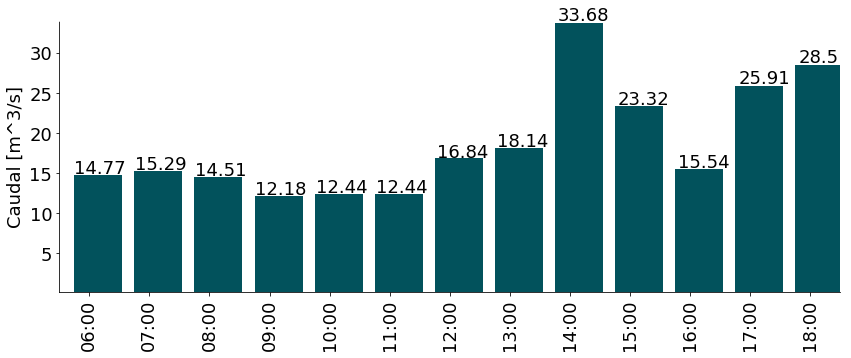

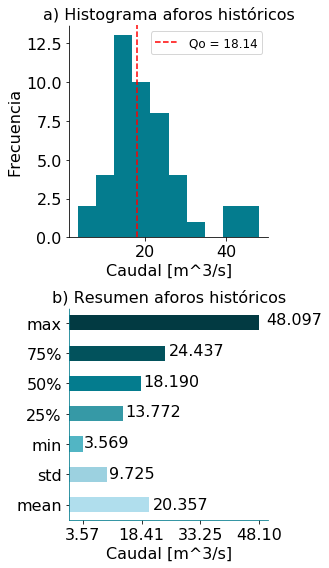

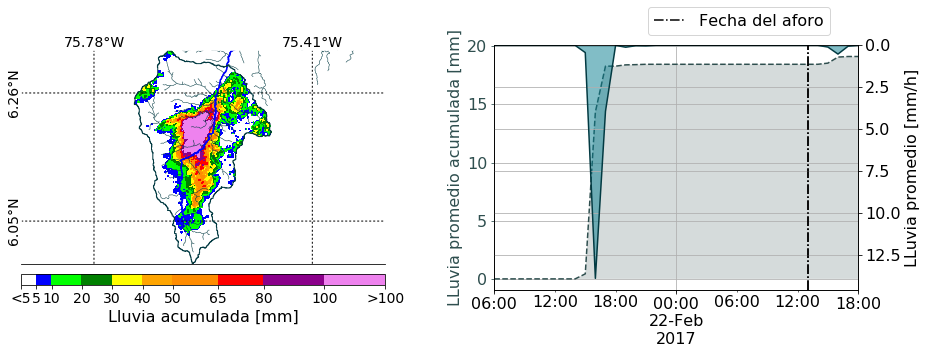

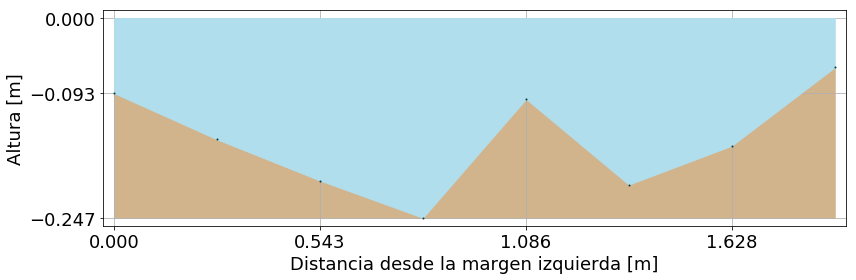

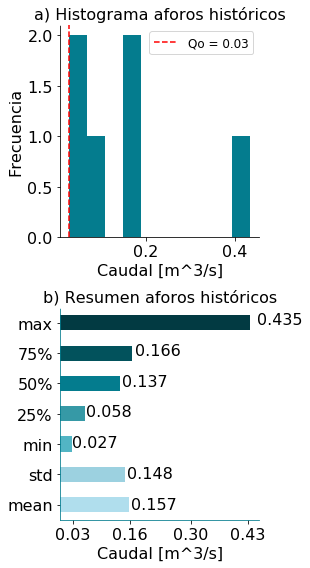

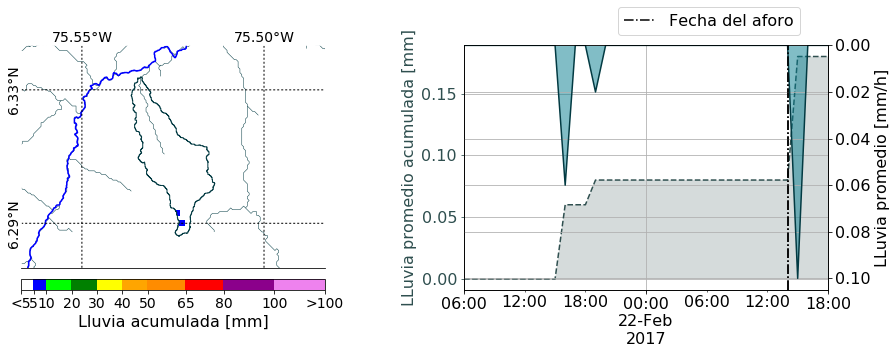

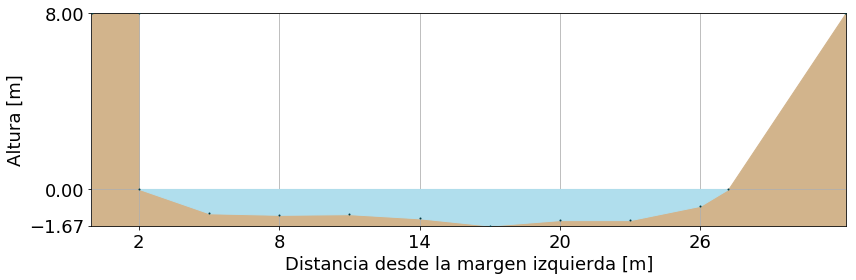

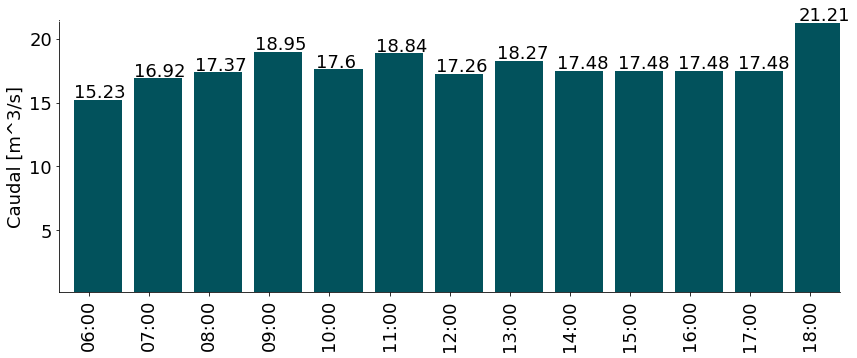

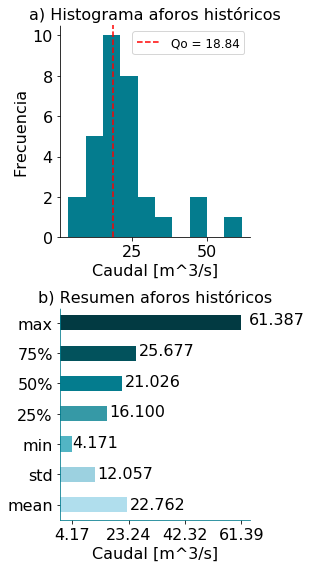

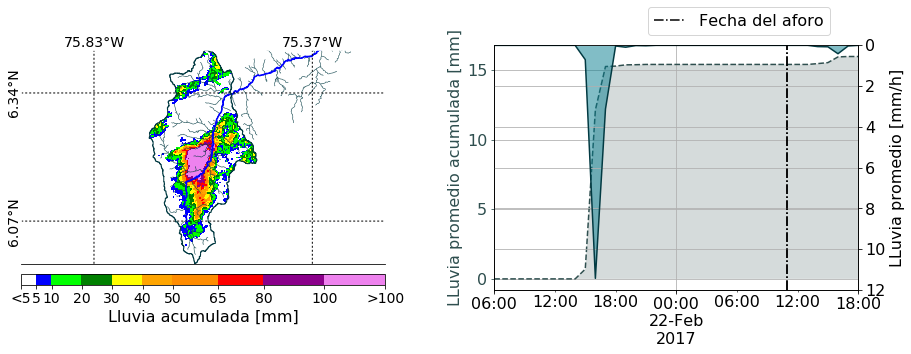

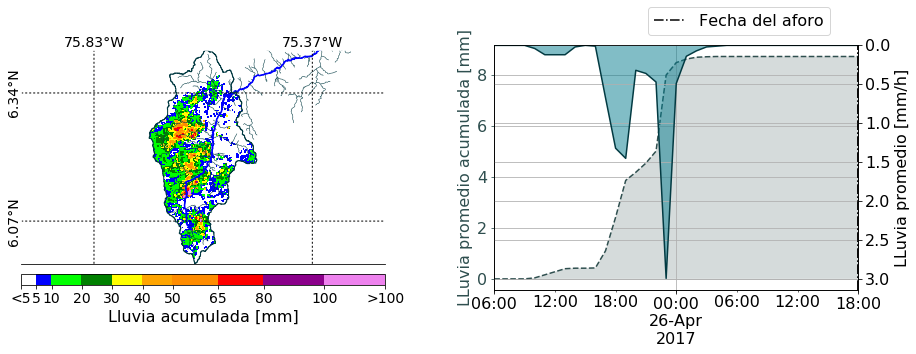

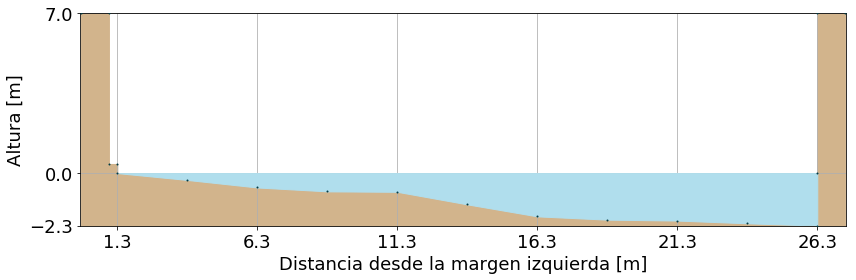

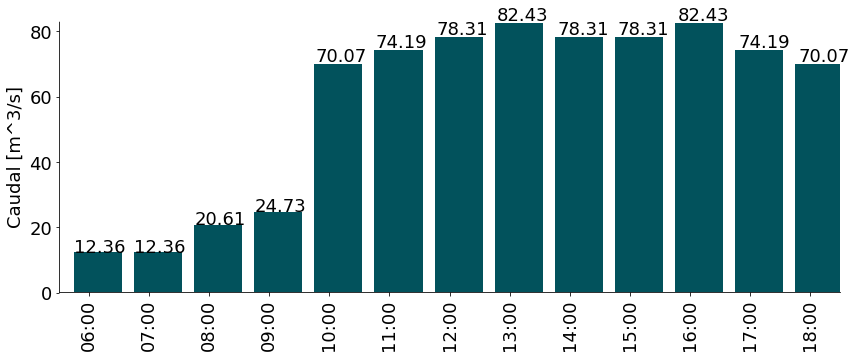

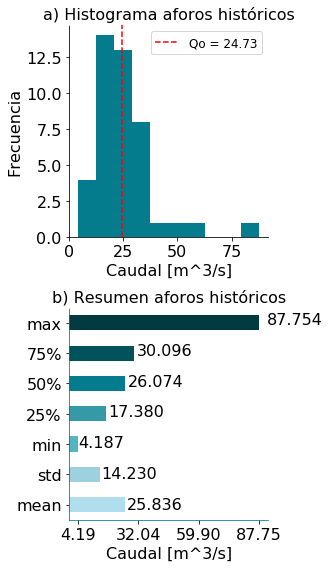

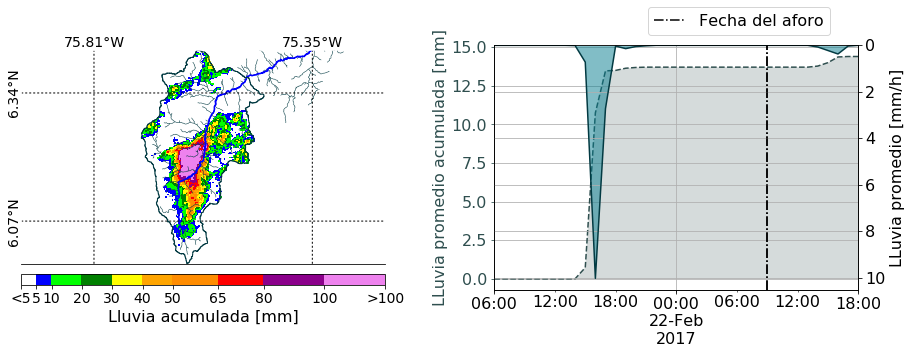

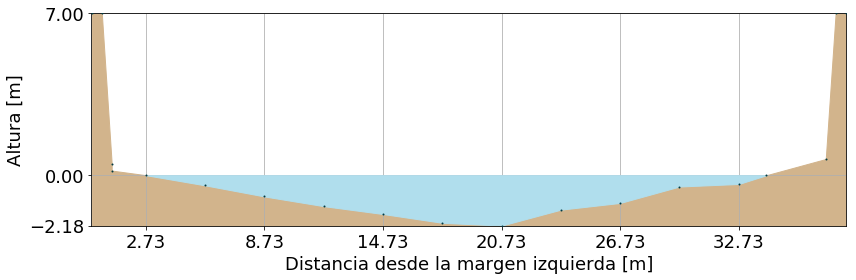

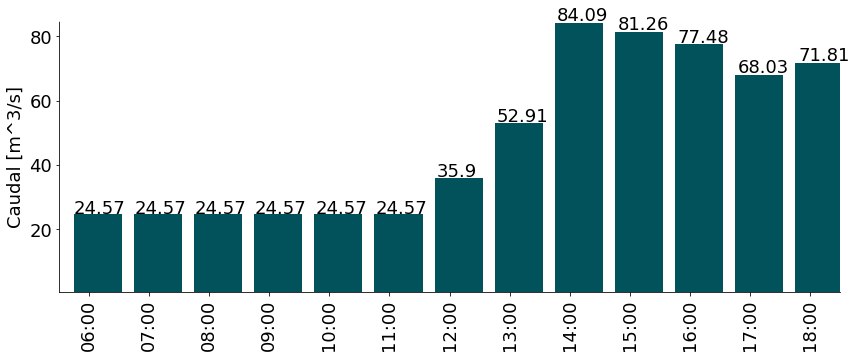

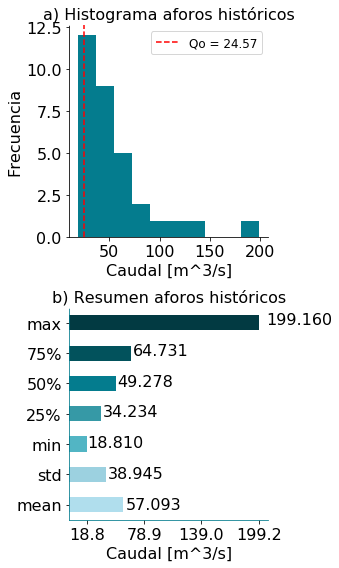

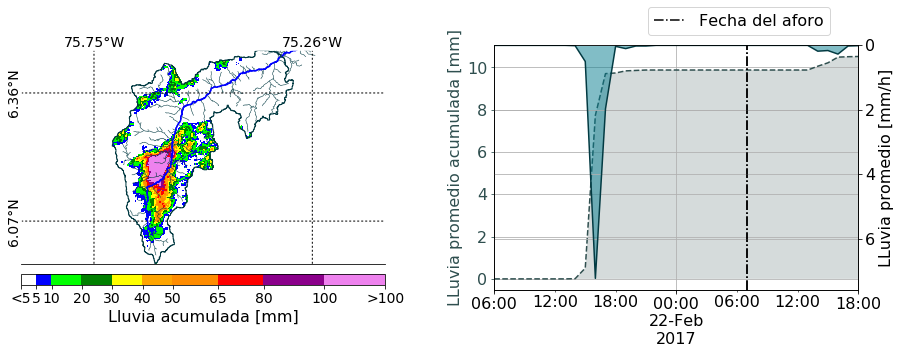

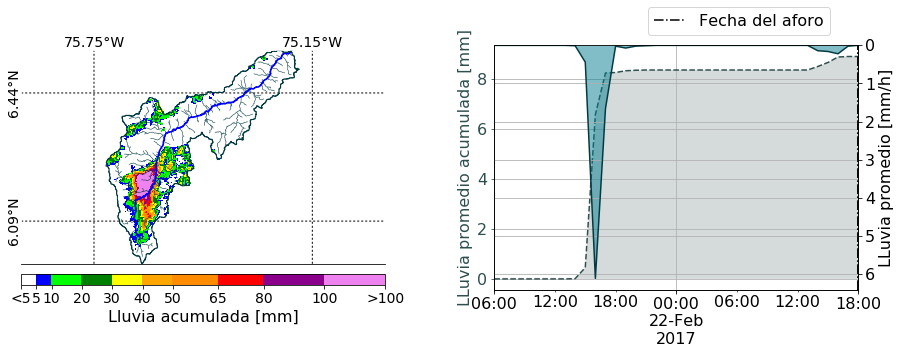

In [59]:
def latex_hidrologia(self,caudal,ruta_fig,label):
        difiere = round(((caudal/self.caudales_historicos.median().values[0])-1.0)*100,3)
        plot_figure = []
        plot_figure.append('\\begin{multicols}{2}')
        plot_figure.append('La figura \\ref{%s} está construida con datos de aforos históricos realizado sobre la misma sección, el recuadro superior es un histograma de frecuencias, mientras que el recuadro inferior es un resumen con los estadísticos más importantes. En total se cuenta con %d aforos, el caudal observado difiere de la mediana histórica %.3f $[m^3/s]$ en un %.2f porciento.'%(label,self.caudales_historicos.index.size,self.caudales_historicos.median().values[0],difiere))                           
        plot_figure.append('{\\centering')
        plot_figure.append('\\includegraphics[width=5.0cm]{{%s}}'%(ruta_fig))
        plot_figure.append('\\captionof{figure}{\small Información de Aforos históricos %s}'%self.name)
        plot_figure.append('\\label{%s}'%label)
        plot_figure.append('}')
        plot_figure.append('\\end{multicols}')
        return plot_figure


resultados = ['']
resultados.append('\\section{%s}'%nombre_salida)
    #--plot map_campain
resultados+=self.latex_figure(17,'%s/%s_map_campain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Mapa %s'%nombre_salida,'fig:%smapcamp'%(fecha.strftime('%Y%m%d')))
resultados+=self.latex_figure(17,'%s/%s_rain.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Lluvia %s'%nombre_salida,'fig:%srain'%(fecha.strftime('%Y%m%d')))
resultados+=self.latex_figure(17,'%s/%s_flux.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d')),'Resultados %s'%nombre_salida,'fig:%sflux'%(fecha.strftime('%Y%m%d')))
resultados+=tabla

df = pd.DataFrame.copy(dfe)
df_alturas = pd.read_csv('../information/%s_heights.csv'%fecha.strftime('%Y%m%d'),index_col=0)
df_alturas.columns = np.array(df_alturas.columns,int)
for i in df.index:
    self = runbyid(i)
    if df.loc[i,'aforo_especial']==1:
        self.dispositivo = '-999'
        resultados+= ['\\subsection{%s}\\'%self.name]
        if int(df.loc[i,'id_estacion_asociada'])==1061:
            resultados+= self.latex_figure(17,'%s/curva_gabino.png'%(fecha.strftime('%Y%m%d')),
                                  'Caudales estimados a partir de curva de calibración',
                                  'fig:%scurva'%(fecha.strftime('%Y%m%d')))
            resultados += ['\\clearpage'] 
    else:
        self.get_resultados_mysql()
        self.dispositivo = self.dfr.loc['dispositivo','Resultado']
        self.plot_section(wet=self.verticales,
                    lev=self.levantamiento,
                    figsize=(12,4),
                    fontsize=18,
                    sepx=0.03,
                    sepy=0.01,
                    filepath='%s/%s_section_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        resultados += self.latex_results_table('tab:%s_hidroparam_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        lbl = '\\ref{tab:%s_hidroparam_%s}'%(fecha.strftime('%Y%m%d'),self.nombre)
        resultados+=['El aforo se realizó en la fecha %s, el caudal obtenido fue de %s $[m^3/s]$. La sección aforada tiene un ancho superficial que mide %s [m], la altura promedio de la lámina de agua es de %s [m], la altura máxima se ubica a %s [m] de la margen izquierda del canal con un valor de %s [m]. Para el cálculo de velocidades se utilizó el dispositivo %s, el valor medio de velocidad obtenido fue de %s $[m/s]$, y el máximo de %s $[m/s]$. La sumatoria de áreas en todas las verticales deja un área total de %s $[m^2]$. Los demás parámetros se pueden observar en la tabla %s.'%(self.fecha.strftime('%Y-%m-%d %H:%M'),round(self.dfr.loc['caudal_medio','Resultado'],3),round(self.dfr.loc['ancho_superficial','Resultado'],3),round(self.dfr.loc['altura_media','Resultado'],3),
        round(abs(self.verticales.set_index('x')['y'].argmin()),3),round(abs(self.verticales['y'].min()),3),self.dfr.loc['dispositivo','Resultado'],
        round(self.dfr.loc['velocidad_media','Resultado']),round(self.verticales['velocidad04'].max(),3),round(self.dfr.loc['area_total','Resultado'],3),lbl)]
        resultados += self.latex_section('%s/%s_section_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                       'fig:%s_section_%s'%(fecha.strftime('%Y%m%d'),self.nombre))+texto
        resultados+=['\\clearpage']
        
    try:
        if int(df.loc[i,'id_estacion_asociada'])==1061:
            dfe.loc[i,'alturas'] = 0
        else:
            caudal = dfe.loc[i,'caudal_medio']
            caudales = self.get_flow_from_heights(caudal,self.codigo,df_alturas)
            self.plot_bars(caudales,rute='%s/%s_heights_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),decimales=2)

            resultados+= self.latex_figure(17,'%s/%s_heights_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                      'Caudales estimados  %s %s'%(nombre_salida,self.name),
                                      'fig:%sheights_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
            resultados+=['Partiendo del caudal estimado mediante el aforo y de datos de nivel de la lámina de agua medidos en campo durante la campaña, se estimaron los caudales horarios desde las 6:00 hasta las 18:00, el caudal promedio durante la campaña fue %.3f $[m^3/s]$. Los resultados se encuentran en la Figura \\ref{%s}.'%(caudales.mean(),'fig:%sheights_%s'%(fecha.strftime('%Y%m%d'),self.nombre))]
            dfe.loc[i,'alturas'] = 1
            print i
    except:
        dfe.loc[i,'alturas'] = 0
    try:
        self.plot_compara_historicos('%s/%s_hist_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        resultados+=latex_hidrologia(self,dfe.loc[i,'caudal_medio'],'%s/%s_hist_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                    'fig:%shist%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        dfe.loc[i,'historico'] = 1
    except:
        dfe.loc[i,'historico'] = 0
    
    if df_informacion.loc[self.codigo,'morfo']==1.0:
        self.simubasin(rute=True,show=False)
        rain = self.plot_lluvia_aforo(ax2color='darkslategrey',
                      fecha=self.fecha.strftime('%Y-%m-%d')+' 18:00',
                      ruta='%s/%s_rain_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                      formato='png')
        
        resultados+= self.latex_figure(17,'%s/%s_rain_%s.png'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre),
                                  'Lluvia %s %s'%(nombre_salida,self.name),
                                  'fig:%srain_%s'%(fecha.strftime('%Y%m%d'),self.nombre))
        if max(self.accumulated_rain)>1.0:
            resultados+=['La mayor intensidad promedio de lluvia fue registrada en la cuenca en la fecha %s, con un valor de %.3f $[mm/h]$.'%(rain.argmax().strftime('%Y-%m-%d %H:%M'),rain.max())]
            resultados+=['La distribución de la lluvia en la cuenca se puede observar en el recuadro izquierdo de la Figura \\ref{%s}, donde se reportó un valor máximo de %.3f $[mm]$.'%('fig:%srain_%s'%(fecha.strftime('%Y%m%d'),self.nombre),max(self.accumulated_rain))]

    try:
        self.dfr = self.dfr.fillna(-999)
        self.verticales = self.verticales.fillna(-999)
        self.levantamiento = self.levantamiento.fillna(-999)
        self.data_to_excel('%s_data/%s_%s.xlsx'%(fecha.strftime('%Y%m%d'),fecha.strftime('%Y%m%d'),self.nombre))
        dfe.loc[i,'datatoexcel']=1
    except:
        dfe.loc[i,'datatoexcel']=0
np.savetxt('%s.tex'%fecha.strftime('%Y%m%d'),resultados, fmt='%s')

In [60]:
nombre_info = 'borrar0222'
includes = ['\\include{Portada}','\\setlength{\\headsep}{40pt}',\
            '\\tableofcontents',\
            '\\listoffigures',\
            '\\listoftables',\
            '\\include{introduccion}',\
            '\\chapter{Información de las estaciones aforadas}']+texto+\
            ['\\clearpage']

self.informe(includes+['\\include{20170222}'],\
             header_filepath='figuras/header.png',\
             header_text='Informe salidas modelación',\
             logo_filepath='figuras/logo.png',\
             cover_filepath = 'figuras/cover.png',\
             foot_filepath = 'figuras/foot.png',\
             nombre_info=nombre_info)
IFrame('%s_optimizado.pdf'%nombre_info, width=1000, height=1000)

# fullinfo

In [155]:
salidas = ['\\include{descripcion}',\
           '\\chapter{Resultados de las campañas}',\
           '\\include{20170222}',\
           '\\include{20170308}',\
           '\\include{20170309}',\
           '\\include{20170426}',\
           '\\include{20170621}',\
           '\\include{20170622}',\
           '\\include{20170710}',\
           '\\include{20170712_LaHueso}',\
           '\\include{20170712_Maria}',\
           '\\include{20170713}']
nombre_info = 'informe_redrio'
includes = ['\\include{Portada}','\\setlength{\\headsep}{40pt}',\
            '\\tableofcontents',\
            '\\listoffigures',\
            '\\listoftables',\
            '\\include{introduccion}',\
            '\\include{metodologia}',\
            '\\chapter{Información de las estaciones aforadas}']+texto+['\\clearpage']
self.informe(includes+salidas,\
             header_filepath='figuras/header.png',\
             header_text='Informe salidas modelación',\
             logo_filepath='figuras/logo.png',\
             cover_filepath = 'figuras/cover.png',\
             foot_filepath = 'figuras/foot.png',\
             nombre_info=nombre_info)

#self.informe(includes,ruta = '../figuras',nombre_info=nombre_info)
IFrame('%s_optimizado.pdf'%nombre_info, width=1000, height=1000)

In [168]:
salidas = ['20170222',\
           '20170308',\
           '20170309',\
           '20170426',\
           '20170621',\
           '20170622',\
           '20170710',\
           '20170712_LaHueso',\
           '20170712_Maria',\
           '20170713']
for i in salidas:
    os.system('zip -r informe_redrio.zip %s/'%i)
    os.system('zip -r informe_redrio.zip %s.tex'%i)
    os.system('zip  -r informe_redrio.zip %s.ipynb'%i)
    os.system('zip  -r informe_redrio.zip *.bib')
os.system('zip -r informe_redrio.zip figuras')
os.system('zip -r informe_redrio.zip descripcion')
os.system('zip -r informe_redrio.zip descripcion.tex')
os.system('zip -r informe_redrio.zip informe_redrio_optimizado.pdf')
os.system('mkdir redrio_data')
os.system('cp -r *data redrio_data')
os.system('zip -r informe_redrio.zip redrio_data')
os.system('zip -r informe_redrio.zip Portada.tex informe_redrio.tex metodologia.tex')


0